In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
dataset=pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [82]:
type(dataset)

pandas.core.frame.DataFrame

# Handling Missing values

In [83]:
dataset.isnull().any()

Country      False
Age           True
Salary        True
Purchased    False
dtype: bool

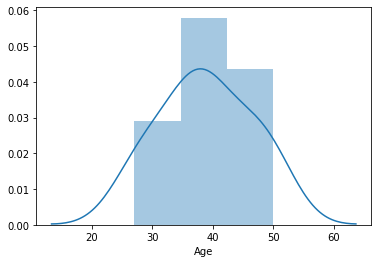

In [84]:
import seaborn as sns
sns.distplot(dataset['Age'].dropna())

In [85]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)

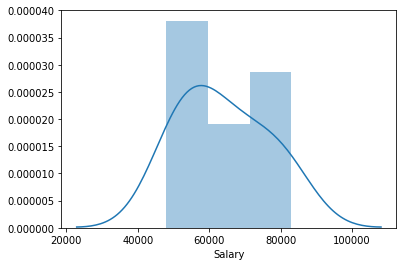

In [86]:
sns.distplot(dataset['Salary'].dropna())

In [87]:
dataset['Salary'].fillna(dataset['Salary'].mean(),inplace=True)

In [88]:
dataset

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


In [89]:
dataset['Age']=dataset['Age'].round()
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,63777.777778,Yes
5,France,35.0,58000.000000,Yes
6,Spain,39.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [90]:
dataset['Salary']=dataset['Salary'].round()
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,63778.0,Yes
5,France,35.0,58000.0,Yes
6,Spain,39.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [91]:
dataset.isnull().any()

Country      False
Age          False
Salary       False
Purchased    False
dtype: bool

# Seprating Independent and dependent Varibles

In [92]:
x=dataset.iloc[:,0:3].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63778.0],
       ['France', 35.0, 58000.0],
       ['Spain', 39.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [93]:
y=dataset.iloc[:,-1].values
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# Encoding Categorical Text Variable

In [94]:
dataset['Country'].value_counts()

France     4
Germany    3
Spain      3
Name: Country, dtype: int64

In [95]:
x.shape

(10, 3)

In [96]:
dataset['Purchased'].value_counts()

Yes    5
No     5
Name: Purchased, dtype: int64

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [98]:
import sklearn
sklearn.__version__

'0.21.2'

In [99]:
ct=ColumnTransformer([("on",OneHotEncoder(drop='first'),[0])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 0.0, 44.0, 72000.0],
       [0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 30.0, 54000.0],
       [0.0, 1.0, 38.0, 61000.0],
       [1.0, 0.0, 40.0, 63778.0],
       [0.0, 0.0, 35.0, 58000.0],
       [0.0, 1.0, 39.0, 52000.0],
       [0.0, 0.0, 48.0, 79000.0],
       [1.0, 0.0, 50.0, 83000.0],
       [0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [100]:
x.shape


(10, 4)

# Removing Dummy Variable

In [101]:
x=[:,1]
x

SyntaxError: invalid syntax (<ipython-input-101-a9f4d0075395>, line 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()

In [ ]:
y=lb.fit_transform(y)
y

# Splitting of train and test Data

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [103]:
x_train.shape

(8, 4)

In [ ]:
x_train

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
y_test